# JOBS Data

Import of all needed libraries, numpy, pandas, matplot, sckitlearn, some will be used further on. 

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data import and structure checking, we can see that we have background variables "x", treatment "t", outcome "y", and effect "e".

In [33]:
df = np.load("D:\Documents\CARRERA\Essex\DataScience-CE888\Assignments\CE888 Assignment 1\jobs.npz")

df.files

['x', 't', 'y', 'e']

Quick check of missing values and shape. We are able to see that there are 3212 rows, and in "x" we notice is is a array of 17x3212, meaning there are 17 background features, while we also have those mentioned above including the labels and there are no missing values in the dataset.

In [34]:
for data in df.files:
  print(f'{data}: {df[data].shape}')

x: (3212, 17)
t: (3212, 1)
y: (3212, 1)
e: (3212, 1)


In this dataset we are able to see that it is closer to reality, as we don't have any counterfactuals, just the outcome, which happens to those datasets that are either purely observational or mixed with _Randomized Controlled Trials_. 

In [35]:
X = df['x']
T = df['t'].reshape(-1, 1)
Y = df['y'].reshape(-1, 1)
e = df['e']

In [36]:
for data in df.files:
  print(f'{data}: {df[data].shape}')

x: (3212, 17)
t: (3212, 1)
y: (3212, 1)
e: (3212, 1)


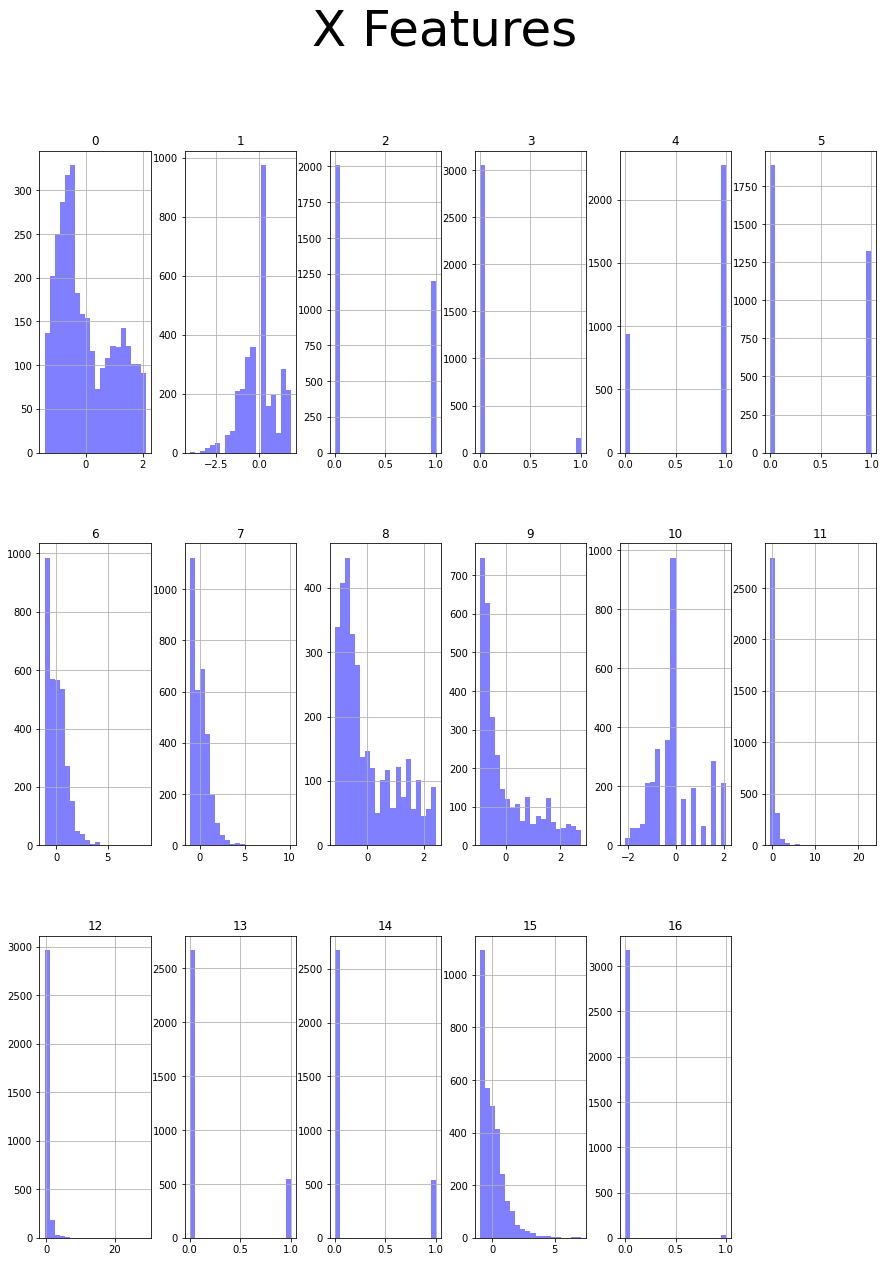

In [37]:
xName = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17"]
Xp = pd.DataFrame(data=X)

axes = Xp.hist(color='b', alpha=0.5, bins=20, figsize=(15,20), layout=(3, 6))
plt.suptitle("X Features", size=50)
plt.savefig("jobs_xFeatures.pdf", dpi=1200)


To have a better understandment of the behaviour of the data, we will plot it's histograms.

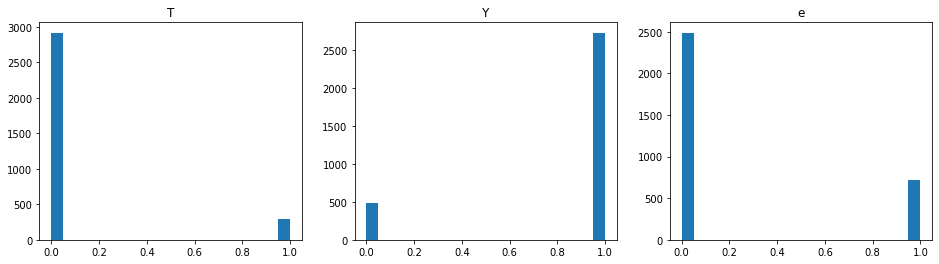

In [38]:
bins=20
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].hist(T, bins=bins)
axs[1].hist(Y, bins=bins)
axs[2].hist(e, bins=bins)
axs[0].title.set_text('T')
axs[1].title.set_text('Y')
axs[2].title.set_text('e')
plt.show()
fig.savefig("jobs_TreatmentAndElse.pdf", dpi=1200)

In [39]:
print("Amount of 0 in T: ", np.count_nonzero(df['t'] == 0))
print("Amount of 1 in T: ", np.count_nonzero(df['t'] == 1))

Amount of 0 in T:  2915
Amount of 1 in T:  297


In [40]:
print("Amount of 0 in Y: ", np.count_nonzero(df['y'] == 0))
print("Amount of 1 in Y: ", np.count_nonzero(df['y'] == 1))

Amount of 0 in Y:  482
Amount of 1 in Y:  2730


In [41]:
print("Amount of 0 in e: ", np.count_nonzero(df['e'] == 0))
print("Amount of 1 in e: ", np.count_nonzero(df['e'] == 1))

Amount of 0 in e:  2490
Amount of 1 in e:  722


In this case we are able to see that the "T", "Y" and "e" have a binary behaviour, and while it is noticeable using the variables histograms, a count was also printed to visualize in another way the differences in all 3 aspects. And further on we can establish that neither X nor Y follow a normal distribution.

IndexError: index 4 is out of bounds for axis 0 with size 4

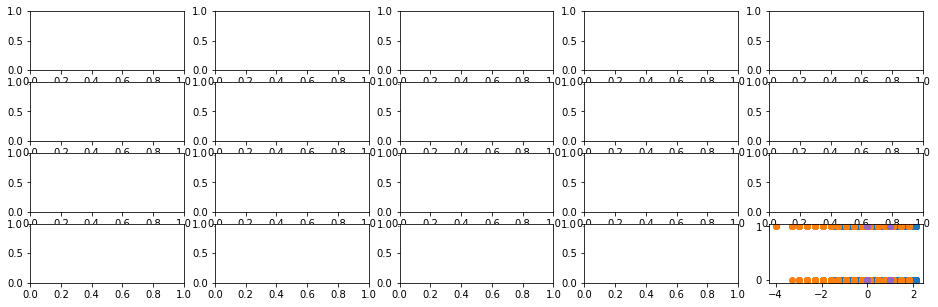

In [79]:
xName = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17"]
Yp = pd.DataFrame(data=Y)
Xpt = pd.DataFrame(data=X.T)
#axes = plt.diff().scatter(Xp, Yp, color='b', alpha=0.5, bins=20, figsize=(15,20), layout=(3, 6))
#plt.suptitle("X Features", size=50)
#plt.savefig("jobs_xFeatures.pdf", dpi=1200)
fig, axs = plt.subplots(4, 5, figsize=(16, 5))
for c in range(17):
    axs[c] = plt.scatter(Xpt.iloc[c].values, Yp)
axs.show()